In [62]:
import pickle
from pathlib import Path
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('/Users/deepakduggirala/Downloads/ELPephants-faster-rcnn-inception-resnet-1024-1024.pickle', 'rb') as f:
    results = pickle.load(f)

In [33]:
detection_boxes = tf.concat([r['detection_boxes'] for r in results], 0).numpy()
detection_scores = tf.concat([r['detection_scores'] for r in results], 0).numpy()
detection_classes = tf.concat([r['detection_classes'] for r in results], 0).numpy()

In [20]:
detection_boxes.shape, detection_scores.shape, detection_classes.shape

(TensorShape([2074, 100, 4]),
 TensorShape([2074, 100]),
 TensorShape([2074, 100]))

In [57]:
root_dir = Path('/Users/deepakduggirala/Documents/ELPephant/images')
images = sorted(root_dir.iterdir())
len(images)

2074

In [74]:
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]



def get_largest_box(bxs):
    largest_box_i = np.argsort((bxs[:, 2] - bxs[:, 0]) * (bxs[:, 3] - bxs[:, 1]))[-1]
    return largest_box_i




def plot_bounding_box(img, boxes, labels=None, normalized=True):
    if labels is None:
        labels = ['box-'+str(i) for i in range(1, len(boxes)+1)]
    plt.figure(figsize=(16, 10))
    plt.imshow(img)
    ax = plt.gca()

    H, W = img.shape[:2]

    for i, (box, label) in enumerate(zip(boxes, labels)):
        if normalized:
            ymin, xmin, ymax, xmax = np.array(box) * [H, W, H, W]
        else:
            ymin, xmin, ymax, xmax = box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=COLORS[i % len(COLORS)], linewidth=3))
        ax.text(xmin, ymin, label, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))

In [80]:
i=1064

elephant_box_indices = np.where((detection_classes[i]==21) & (detection_scores[i] > 0.5))[0]
largest_box_index = get_largest_box(detection_boxes[i][elephant_box_indices])

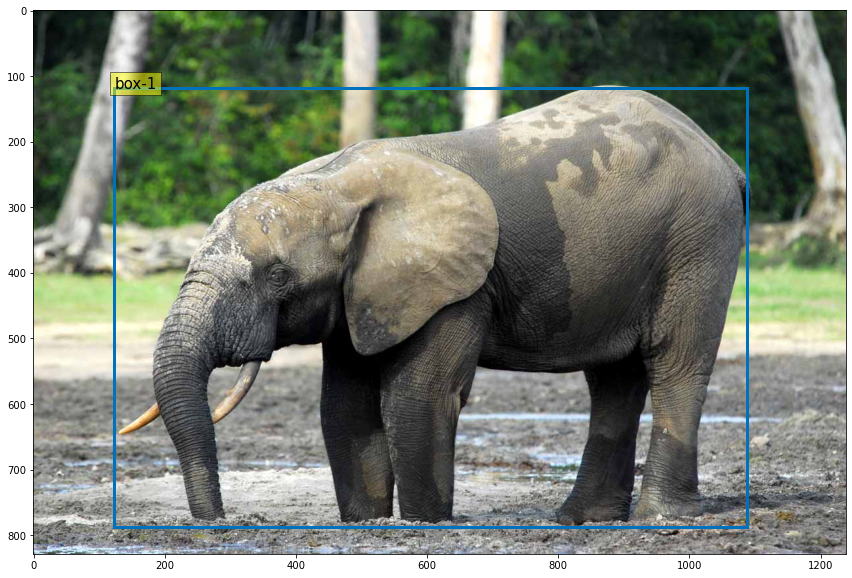

In [81]:
img = plt.imread(images[i])
plot_bounding_box(img, 
                  boxes = [detection_boxes[i][largest_box_index]])